In [31]:
import pandas as pd

#Data Visualization
from matplotlib import pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
plt.style.available
import seaborn as sns
plt.style.use('ggplot') 
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [32]:
train = pd.read_csv(r'https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv')
test = pd.read_csv(r'https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/test.csv')

In [33]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [36]:
train['Pclass'] = train['Pclass'].map(str)

In [37]:
train_test_data = [train] # combining train and test dataset

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [38]:
title_mapping = {"Mr": "Mr", "Miss": "Miss", "Mrs": "Mrs", 
                 "Master": "Other", "Dr": "Other", "Rev": "Other", "Col": "Other", "Major": "Other", "Mlle": "Other","Countess": "Other",
                 "Ms": "Other", "Lady": "Other", "Jonkheer": "Other", "Don": "Other", "Dona" : "Other", "Mme": "Other","Capt": "Other","Sir": "Other" }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [39]:
train.drop('Name', axis=1, inplace=True)
# test.drop('Name', axis=1, inplace=True)

In [40]:
sex_mapping = {"male": 0, "female": 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [41]:
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
# test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

In [42]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [43]:
# embarked_mapping = {"S": 0, "C": 1, "Q": 2}
# for dataset in train_test_data:
#     dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [44]:
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
# test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)

In [45]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
# test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

In [46]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,Mr,1


In [47]:
train.drop(['Parch','SibSp', 'Ticket', 'Cabin'],axis=1, inplace=True)

# Training Data without additional Features

In [48]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,1,0,3,0,22.0,7.2500,S,Mr,2
1,2,1,1,1,38.0,71.2833,C,Mrs,2
2,3,1,3,1,26.0,7.9250,S,Miss,1
3,4,1,1,1,35.0,53.1000,S,Mrs,2
4,5,0,3,0,35.0,8.0500,S,Mr,1


In [49]:
train_df = pd.get_dummies(data=train, columns=['Pclass', 'Embarked', 'Title'])

In [50]:
train_df.head()

,PassengerId,Survived,Sex,Age,Fare,FamilySize,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,1,0,0,22.0,7.2500,2,0,0,1,0,0,1,0,1,0,0
1,2,1,1,38.0,71.2833,2,1,0,0,1,0,0,0,0,1,0
2,3,1,1,26.0,7.9250,1,0,0,1,0,0,1,1,0,0,0
3,4,1,1,35.0,53.1000,2,1,0,0,0,0,1,0,0,1,0
4,5,0,0,35.0,8.0500,1,0,0,1,0,0,1,0,1,0,0


In [51]:
cols_to_scale = ['Age', 'Fare', 'FamilySize']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_df[cols_to_scale] = scaler.fit_transform(train_df[cols_to_scale])

In [52]:
train_data = train_df.drop(['PassengerId','Survived'], axis=1)
target = train_df['Survived']

train_data.shape, target.shape

((891, 14), (891,))

In [53]:
# train_data

In [54]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

import xgboost as xgb 

In [55]:
model_params = {
    'svm': {
        'model': svm.SVC(max_iter=-1),
        'params' : {
            'C': [1,10,20],
#             'kernel': ['linear', 'rbf',],
#             'gamma' :['scale', 'auto']
            #'shrinking':['True', 'False']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10,100],
            'max_depth': [1,2,3,4,5,6],
            'min_samples_leaf': [100,200,300,500,1000]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(multi_class='auto'),
        'params': {
            'C': [1,5,10],
            'solver':['newton-cg', 'liblinear']
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },
    'naive_bayes_multinomial': {
        'model': MultinomialNB(),
        'params': {}
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
            'max_depth': [1,2,3,4,5,6],
            'min_samples_leaf': [100,200,300,500,1000]
        }
    },

    'xgboost' : {
          'model' : xgb.XGBClassifier(),
          'params': {'n_estimators': [1,5,10,100],
            'max_depth': [1,2,3,4,5,6],
            'learning_rate': [.001,.01, .1] 
            
            }
    },
    'kneighbours': {
        'model': KNeighborsClassifier(n_jobs=-1),
        "params": {
            
            'n_neighbors' : [5, 10, 20, 30],
        }
    },


}

In [56]:
from sklearn.model_selection import GridSearchCV
scores = []

for model_name, mp in model_params.items():
    print(model_name)
    clf =  GridSearchCV(mp['model'], mp['params'], cv=10, return_train_score=False)
    clf.fit(train_data, target)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df.sort_values('best_score')

svm
random_forest
logistic_regression
naive_bayes_gaussian
naive_bayes_multinomial
decision_tree
xgboost
kneighbours


,model,best_score,best_params
1,random_forest,0.785581,"{'max_depth': 6, 'min_samples_leaf': 100, 'n_e..."
5,decision_tree,0.789051,"{'criterion': 'gini', 'max_depth': 2, 'min_sam..."
4,naive_bayes_multinomial,0.790112,{}
3,naive_bayes_gaussian,0.791248,{}
7,kneighbours,0.814844,{'n_neighbors': 10}
2,logistic_regression,0.820449,"{'C': 5, 'solver': 'newton-cg'}"
0,svm,0.832797,{'C': 20}
6,xgboost,0.841785,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti..."


In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data, target,test_size=0.2,random_state=5)

## XGboost Results

In [58]:
model = xgb.XGBClassifier(n_jobs=-1, learning_rate= 0.1, max_depth= 3, n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [59]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       111
           1       0.89      0.74      0.81        68

    accuracy                           0.87       179
   macro avg       0.87      0.84      0.85       179
weighted avg       0.87      0.87      0.86       179



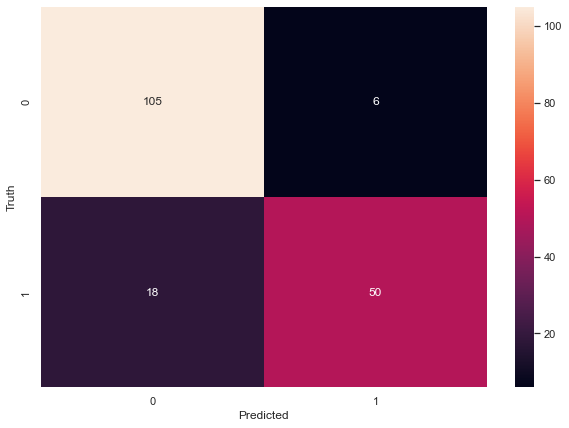

In [60]:
import seaborn as sn
cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

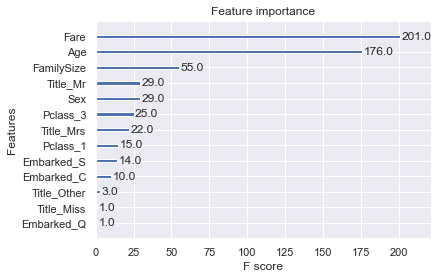

In [61]:
from xgboost import plot_importance
plot_importance(model)
plt.show()

# Feature Tools: Creating more Attributes

In [39]:
es = ft.EntitySet(id="train")

In [40]:
es = es.entity_from_dataframe(entity_id="train_data",
                              dataframe=train,
                              index="PassengerId")

es

Entityset: train
  Entities:
    train_data [Rows: 891, Columns: 9]
  Relationships:
    No relationships

## Embarked

In [41]:
es = es.normalize_entity(base_entity_id="train_data",
                             new_entity_id="Embarked",
                            index="Embarked")
es#["Embarked"].variables

Entityset: train
  Entities:
    train_data [Rows: 891, Columns: 9]
    Embarked [Rows: 3, Columns: 1]
  Relationships:
    train_data.Embarked -> Embarked.Embarked

In [42]:
features_em, feature_names_em = ft.dfs(
    entityset=es,
    target_entity='Embarked',
    agg_primitives=['entropy','sum','num_unique','count', 'mean', 'median'],
    max_depth=1,
    verbose=True)

Built 20 features
Elapsed: 00:00 | Progress: 100%|███████████████████████████████████████████████████████████████████████████████████████


In [43]:
features_em

,ENTROPY(train_data.Pclass),ENTROPY(train_data.Title),SUM(train_data.Survived),SUM(train_data.Age),SUM(train_data.Fare),SUM(train_data.FamilySize),SUM(train_data.Sex),NUM_UNIQUE(train_data.Pclass),NUM_UNIQUE(train_data.Title),COUNT(train_data),MEAN(train_data.Survived),MEAN(train_data.Age),MEAN(train_data.Fare),MEAN(train_data.FamilySize),MEAN(train_data.Sex),MEDIAN(train_data.Survived),MEDIAN(train_data.Age),MEDIAN(train_data.Fare),MEDIAN(train_data.FamilySize),MEDIAN(train_data.Sex)
Embarked,,,,,,,,,,,,,,,,,,,,
S,0.999968,1.068593,219,19015.75,17599.3988,1280,205,3,4,646,0.339009,29.436146,27.243651,1.981424,0.317337,0,30.0,13.00,1,0
C,0.943564,1.199833,93,5100.92,10072.2962,294,73,3,4,168,0.553571,30.362619,59.954144,1.750000,0.434524,1,30.0,29.70,1,0
Q,0.284038,1.046814,30,2054.50,1022.2543,123,36,3,4,77,0.389610,26.681818,13.276030,1.597403,0.467532,0,30.0,7.75,1,0


In [44]:
features_em['survival_rate_embarked'] = features_em['SUM(train_data.Survived)']/features_em['COUNT(train_data)']

In [45]:
features_em = features_em[['ENTROPY(train_data.Title)','ENTROPY(train_data.Pclass)','SUM(train_data.Age)',
       'SUM(train_data.FamilySize)',
       'SUM(train_data.Fare)', 'survival_rate_embarked',
       'MEAN(train_data.Age)',
       'MEAN(train_data.FamilySize)',
       'MEAN(train_data.Fare)', 
        'MEDIAN(train_data.Fare)']]

In [46]:
features_em.columns = ['embarked_entropy_title)','embarked_entropy_pclass','embarked_sum_age', 'embarked_sum_famsize',
       'embarked_sum_fare', 'survival_rate_embarked',
       'embarked_mean_age', 'embarked_mean_famsize',
       'embarked_mean_fare', 'embarked_med_fare']

In [47]:
features_em.reset_index(inplace=True)

In [48]:
train_em = train.merge(features_em, how='left')

## Pclass

In [49]:
es = es.normalize_entity(base_entity_id="train_data",
                             new_entity_id="Pclass",
                             index="Pclass")
es#["Embarked"].variables

Entityset: train
  Entities:
    train_data [Rows: 891, Columns: 9]
    Embarked [Rows: 3, Columns: 1]
    Pclass [Rows: 3, Columns: 1]
  Relationships:
    train_data.Embarked -> Embarked.Embarked
    train_data.Pclass -> Pclass.Pclass

In [50]:
features_pc, feature_names_pc = ft.dfs(
    entityset=es,
    target_entity='Pclass',
    agg_primitives=['entropy','sum','num_unique','count', 'mean', 'median'],
    max_depth=1,
    verbose=True)

Built 20 features
Elapsed: 00:00 | Progress: 100%|███████████████████████████████████████████████████████████████████████████████████████


In [51]:
features_pc['survival_rate_pclass'] = features_pc['SUM(train_data.Survived)']/features_pc['COUNT(train_data)']

In [52]:
features_pc = features_pc[['ENTROPY(train_data.Embarked)', 'ENTROPY(train_data.Title)',
       'SUM(train_data.Age)',
        'SUM(train_data.FamilySize)',
       'SUM(train_data.Fare)', 'MEAN(train_data.Age)',
       'MEAN(train_data.FamilySize)',
       'MEAN(train_data.Fare)', 
       'MEDIAN(train_data.Age)', 
       'MEDIAN(train_data.Fare)',
       'survival_rate_pclass']]

In [53]:
features_pc.columns = ['pclass_entropy_embarked','pclass_entropy_title','pclass_sum_age', 'pclass_sum_famsize',
       'pclass_sum_fare', 'pclass_mean_age', 'pclass_mean_famsize',
       'pclass_mean_fare', 'pclass_med_age',  'pclass_med_fare', 
      'survival_rate_pclass',]

In [54]:
features_pc

,pclass_entropy_embarked,pclass_entropy_title,pclass_sum_age,pclass_sum_famsize,pclass_sum_fare,pclass_mean_age,pclass_mean_famsize,pclass_mean_fare,pclass_med_age,pclass_med_fare,survival_rate_pclass
Pclass,,,,,,,,,,,
3,0.788500,0.980299,12668.92,986,6714.6951,25.802281,2.008147,13.675550,27.0,8.0500,0.242363
1,0.718207,1.222374,8021.42,383,18177.4125,37.136204,1.773148,84.154687,35.0,60.2875,0.629630
2,0.389726,1.222177,5480.83,328,3801.8417,29.787120,1.782609,20.662183,30.0,14.2500,0.472826


## Title

In [55]:
train_em_pc = train_em.merge(features_pc.reset_index(), how='left')

In [56]:
es = es.normalize_entity(base_entity_id="train_data",
                             new_entity_id="Title",
                            index="Title")
es#["Embarked"].variables

Entityset: train
  Entities:
    train_data [Rows: 891, Columns: 9]
    Embarked [Rows: 3, Columns: 1]
    Pclass [Rows: 3, Columns: 1]
    Title [Rows: 4, Columns: 1]
  Relationships:
    train_data.Embarked -> Embarked.Embarked
    train_data.Pclass -> Pclass.Pclass
    train_data.Title -> Title.Title

In [57]:
features_t, feature_names_t = ft.dfs(
    entityset=es,
    target_entity='Title',
    agg_primitives=['entropy','sum','num_unique','count', 'mean', 'median'],
    max_depth=1,
    verbose=True)

Built 20 features
Elapsed: 00:00 | Progress: 100%|███████████████████████████████████████████████████████████████████████████████████████


In [58]:
features_t.columns

Index(['ENTROPY(train_data.Pclass)', 'ENTROPY(train_data.Embarked)',
       'SUM(train_data.Survived)', 'SUM(train_data.Age)',
       'SUM(train_data.Fare)', 'SUM(train_data.FamilySize)',
       'SUM(train_data.Sex)', 'NUM_UNIQUE(train_data.Pclass)',
       'NUM_UNIQUE(train_data.Embarked)', 'COUNT(train_data)',
       'MEAN(train_data.Survived)', 'MEAN(train_data.Age)',
       'MEAN(train_data.Fare)', 'MEAN(train_data.FamilySize)',
       'MEAN(train_data.Sex)', 'MEDIAN(train_data.Survived)',
       'MEDIAN(train_data.Age)', 'MEDIAN(train_data.Fare)',
       'MEDIAN(train_data.FamilySize)', 'MEDIAN(train_data.Sex)'],
      dtype='object')

In [59]:
features_t

,ENTROPY(train_data.Pclass),ENTROPY(train_data.Embarked),SUM(train_data.Survived),SUM(train_data.Age),SUM(train_data.Fare),SUM(train_data.FamilySize),SUM(train_data.Sex),NUM_UNIQUE(train_data.Pclass),NUM_UNIQUE(train_data.Embarked),COUNT(train_data),MEAN(train_data.Survived),MEAN(train_data.Age),MEAN(train_data.Fare),MEAN(train_data.FamilySize),MEAN(train_data.Sex),MEDIAN(train_data.Survived),MEDIAN(train_data.Age),MEDIAN(train_data.Fare),MEDIAN(train_data.FamilySize),MEDIAN(train_data.Sex)
Title,,,,,,,,,,,,,,,,,,,,
Mr,0.929712,0.681921,81,16452.50,12636.2865,745,0,3,3,517,0.156673,31.823017,24.441560,1.441006,0.000000,0,30.0,9.35000,1,0
Mrs,1.098548,0.666412,99,4472.00,5642.3166,316,125,3,3,125,0.792000,35.776000,45.138533,2.528000,1.000000,1,35.0,26.00000,2,1
Miss,0.985540,0.938233,127,3935.00,7971.2128,412,182,3,3,182,0.697802,21.620879,43.797873,2.263736,1.000000,1,21.0,15.62085,1,1
Other,1.081358,0.791942,35,1311.67,2444.1334,224,7,3,3,67,0.522388,19.577164,36.479603,3.343284,0.104478,1,9.0,29.12500,3,0


In [60]:
features_t = features_t[['ENTROPY(train_data.Embarked)', 'ENTROPY(train_data.Pclass)',
       'SUM(train_data.Age)',
       'SUM(train_data.FamilySize)',
       'SUM(train_data.Fare)',
       'MEAN(train_data.Age)',
       'MEAN(train_data.Survived)', 'MEAN(train_data.FamilySize)',
       'MEAN(train_data.Fare)', 
       'MEDIAN(train_data.Age)', 
       'MEDIAN(train_data.FamilySize)', 'MEDIAN(train_data.Fare)']]

In [61]:
features_t.columns = ['title_entropy_embarked','title_entropy_pclass','title_sum_age', 'title_sum_famsize',
       'title_sum_fare',  'title_mean_age','survival_rate_title', 'title_mean_famsize',
       'title_mean_fare', 'title_med_age',  'title_med_famsize', 'title_med_fare',]

In [62]:
features_t

,title_entropy_embarked,title_entropy_pclass,title_sum_age,title_sum_famsize,title_sum_fare,title_mean_age,survival_rate_title,title_mean_famsize,title_mean_fare,title_med_age,title_med_famsize,title_med_fare
Title,,,,,,,,,,,,
Mr,0.681921,0.929712,16452.50,745,12636.2865,31.823017,0.156673,1.441006,24.441560,30.0,1,9.35000
Mrs,0.666412,1.098548,4472.00,316,5642.3166,35.776000,0.792000,2.528000,45.138533,35.0,2,26.00000
Miss,0.938233,0.985540,3935.00,412,7971.2128,21.620879,0.697802,2.263736,43.797873,21.0,1,15.62085
Other,0.791942,1.081358,1311.67,224,2444.1334,19.577164,0.522388,3.343284,36.479603,9.0,3,29.12500


In [63]:
train_new_features = train_em_pc.merge(features_t.reset_index(), how='left')

## New Training Data

In [64]:
train_new_features.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,embarked_entropy_title),...,title_sum_age,title_sum_famsize,title_sum_fare,title_mean_age,survival_rate_title,title_mean_famsize,title_mean_fare,title_med_age,title_med_famsize,title_med_fare
0,1,0,3,0,22.0,7.2500,S,Mr,2,1.068593,...,16452.5,745,12636.2865,31.823017,0.156673,1.441006,24.441560,30.0,1,9.35000
1,2,1,1,1,38.0,71.2833,C,Mrs,2,1.199833,...,4472.0,316,5642.3166,35.776000,0.792000,2.528000,45.138533,35.0,2,26.00000
2,3,1,3,1,26.0,7.9250,S,Miss,1,1.068593,...,3935.0,412,7971.2128,21.620879,0.697802,2.263736,43.797873,21.0,1,15.62085
3,4,1,1,1,35.0,53.1000,S,Mrs,2,1.068593,...,4472.0,316,5642.3166,35.776000,0.792000,2.528000,45.138533,35.0,2,26.00000
4,5,0,3,0,35.0,8.0500,S,Mr,1,1.068593,...,16452.5,745,12636.2865,31.823017,0.156673,1.441006,24.441560,30.0,1,9.35000


In [65]:
train_df = pd.get_dummies(data=train_new_features, columns=['Pclass', 'Embarked', 'Title'])

In [66]:
# train_df.head()

In [67]:
cols_to_scale = ['Age', 'Fare', 'FamilySize']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_df[cols_to_scale] = scaler.fit_transform(train_df[cols_to_scale])

In [78]:
train_data = train_df.drop(['PassengerId','Survived'], axis=1)
target = train_df['Survived']

train_data.shape, target.shape

((891, 47), (891,))

Increased the number of Attributes to 47 from the original 14

In [79]:
model_params = {
    'svm': {
        'model': svm.SVC(max_iter=-1),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf',],
#             'gamma' :['scale', 'auto']
            #'shrinking':['True', 'False']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10,100],
            'max_depth': [1,2,3,4,5,6],
            'min_samples_leaf': [100,200,300,500,1000]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(multi_class='auto'),
        'params': {
#             'C': [1,5,10],
#             'solver':['newton-cg', 'liblinear']
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },
    'naive_bayes_multinomial': {
        'model': MultinomialNB(),
        'params': {}
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
            'max_depth': [1,2,3,4,5,6],
            'min_samples_leaf': [100,200,300,500,1000]
        }
    },

    'xgboost' : {
          'model' : xgb.XGBClassifier(),
          'params': {'n_estimators': [1,5,10,100],
            'max_depth': [1,2,3,4,5,6],
            'learning_rate': [.001,.01, .1] 
            
            }
    },
    'kneighbours': {
        'model': KNeighborsClassifier(n_jobs=-1),
        "params": {
            
            'n_neighbors' : [5, 10, 20, 30],
        }
    },


}

In [80]:
from sklearn.model_selection import GridSearchCV
scores = []

for model_name, mp in model_params.items():
    print(model_name)
    clf =  GridSearchCV(mp['model'], mp['params'], cv=10, return_train_score=False)
    clf.fit(train_data, target)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df.sort_values('best_score')

svm
random_forest
logistic_regression
naive_bayes_gaussian
naive_bayes_multinomial
decision_tree
xgboost
kneighbours


,model,best_score,best_params
4,naive_bayes_multinomial,0.726242,{}
3,naive_bayes_gaussian,0.772210,{}
2,logistic_regression,0.785605,{}
5,decision_tree,0.789051,"{'criterion': 'gini', 'max_depth': 2, 'min_sam..."
1,random_forest,0.793521,"{'max_depth': 3, 'min_samples_leaf': 200, 'n_e..."
7,kneighbours,0.813683,{'n_neighbors': 30}
0,svm,0.817041,"{'C': 20, 'kernel': 'rbf'}"
6,xgboost,0.845169,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti..."


## XGboost Results

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data, target,test_size=0.2,random_state=5)

In [82]:
model = xgb.XGBClassifier(n_jobs=-1, learning_rate= 0.1, max_depth= 3, n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [83]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       111
           1       0.89      0.74      0.81        68

    accuracy                           0.87       179
   macro avg       0.87      0.84      0.85       179
weighted avg       0.87      0.87      0.86       179



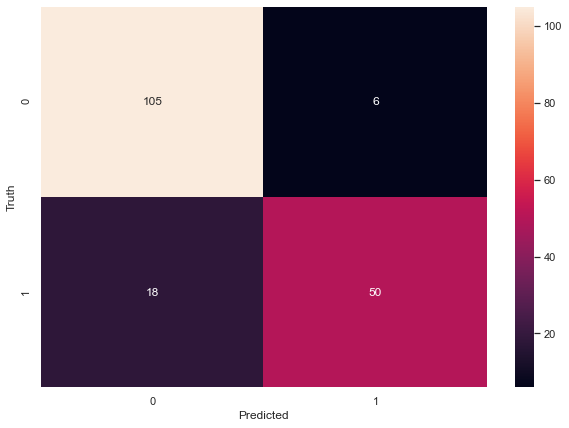

In [84]:
import seaborn as sn
cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

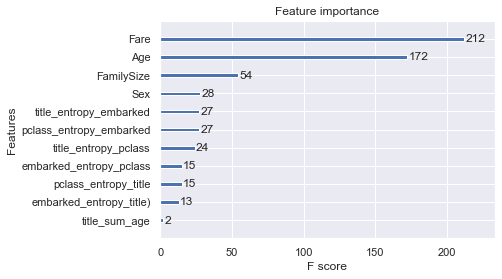

In [85]:
from xgboost import plot_importance
plot_importance(model)
plt.show()